###  GPU benchmark on MNIST

###  APA Citions and Sources

Belcic, I., & Stryker, C. (2024, July 23). What is hyperparameter tuning? IBM Think. https://www.ibm.com/think/topics/hyperparameter-tuning

Masters, D., & Luschi, C. (2018). Revisiting small batch training for deep neural networks. arXiv. https://doi.org/10.48550/arXiv.1804.07612

Devarakonda, A., Naumov, M., & Garland, M. (2018). AdaBatch: Adaptive batch sizes for training deep neural networks. arXiv. https://doi.org/10.48550/arXiv.1712.02029

In [1]:
!pip install --upgrade pip
!pip install "tensorflow==2.15.*" "keras==2.15.*" numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import time, os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras as k
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras import backend as K


# data preprocessing
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28,28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_test=x_test.astype('float32')
x_train=x_train.astype('float32')
mean=np.mean(x_train)
std=np.std(x_train)
x_test = (x_test-mean)/std
x_train = (x_train-mean)/std

# labels
num_classes=10
y_train = k.utils.to_categorical(y_train, num_classes)
y_test = k.utils.to_categorical(y_test, num_classes)

2025-09-22 17:08:58.715925: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-22 17:08:58.716122: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-22 17:08:58.989524: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-22 17:08:59.787991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-22 17:09:11.203475: W tensorflow/compiler/tf2

In [3]:
print("TF version:", tf.__version__)
print("Keras version:", k.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))

TF version: 2.15.0
Keras version: 2.15.0
GPUs: []


2025-09-22 17:09:37.616820: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
for i in range(8):
    n=2**i
    
    # build model
    num_filter=n
    num_dense=512
    drop_dense=0.7
    ac='relu'
    learningrate=0.001

    model = Sequential()

    model.add(Conv2D(num_filter, (3, 3), activation=ac, input_shape=(28, 28, 1), padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(num_filter, (3, 3), activation=ac, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 14x14x32

    model.add(Conv2D(2*num_filter, (3, 3), activation=ac, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(2*num_filter, (3, 3), activation=ac, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 7x7x64 = 3136 neurons

    model.add(Flatten())                        
    model.add(Dense(num_dense, activation=ac))
    model.add(BatchNormalization())
    model.add(Dropout(drop_dense))
    model.add(Dense(10, activation='softmax'))

    adm=Adam(lr=learningrate, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adm)
    for j in range(8):
        k=8*2**j
        print("number of filters " + str(n))
        print("batch size " + str(k))
        model.fit(x_train, y_train, batch_size=k, epochs=1, validation_data=(x_test, y_test))

number of filters 1
batch size 8
7500/7500 [==============================] - 31s 4ms/step - loss: 0.7040 - accuracy: 0.7837 - val_loss: 0.1980 - val_accuracy: 0.9388
number of filters 1
batch size 16
3750/3750 [==============================] - 26s 7ms/step - loss: 0.2986 - accuracy: 0.9086 - val_loss: 0.1463 - val_accuracy: 0.9527
number of filters 1
batch size 32
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2071 - accuracy: 0.9358 - val_loss: 0.1158 - val_accuracy: 0.9647
number of filters 1
batch size 64
938/938 [==============================] - 12s 13ms/step - loss: 0.1685 - accuracy: 0.9482 - val_loss: 0.1026 - val_accuracy: 0.9678
number of filters 1
batch size 128
469/469 [==============================] - 10s 22ms/step - loss: 0.1454 - accuracy: 0.9544 - val_loss: 0.0960 - val_accuracy: 0.9690
number of filters 1
batch size 256
235/235 [==============================] - 15s 64ms/step - loss: 0.1314 - accuracy: 0.9589 - val_loss: 0.0927 - val_accuracy: 0

number of filters 2
batch size 8
7500/7500 [==============================] - 38s 5ms/step - loss: 0.4093 - accuracy: 0.8767 - val_loss: 0.0995 - val_accuracy: 0.9686
number of filters 2
batch size 16
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1586 - accuracy: 0.9515 - val_loss: 0.0718 - val_accuracy: 0.9760
number of filters 2
batch size 32
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1054 - accuracy: 0.9674 - val_loss: 0.0564 - val_accuracy: 0.9808
number of filters 2
batch size 64
938/938 [==============================] - 15s 15ms/step - loss: 0.0824 - accuracy: 0.9750 - val_loss: 0.0476 - val_accuracy: 0.9828
number of filters 2
batch size 128
469/469 [==============================] - 19s 40ms/step - loss: 0.0684 - accuracy: 0.9789 - val_loss: 0.0458 - val_accuracy: 0.9846
number of filters 2
batch size 256
235/235 [==============================] - 19s 80ms/step - loss: 0.0598 - accuracy: 0.9809 - val_loss: 0.0452 - val_accuracy: 

number of filters 4
batch size 8
7500/7500 [==============================] - 34s 4ms/step - loss: 0.3155 - accuracy: 0.9052 - val_loss: 0.0768 - val_accuracy: 0.9772
number of filters 4
batch size 16
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1150 - accuracy: 0.9661 - val_loss: 0.0499 - val_accuracy: 0.9840
number of filters 4
batch size 32
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0702 - accuracy: 0.9787 - val_loss: 0.0350 - val_accuracy: 0.9889
number of filters 4
batch size 64
938/938 [==============================] - 21s 23ms/step - loss: 0.0520 - accuracy: 0.9839 - val_loss: 0.0315 - val_accuracy: 0.9896
number of filters 4
batch size 128
469/469 [==============================] - 20s 42ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0286 - val_accuracy: 0.9906
number of filters 4
batch size 256
235/235 [==============================] - 19s 80ms/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0285 - val_accuracy: 

number of filters 8
batch size 8
7500/7500 [==============================] - 40s 5ms/step - loss: 0.2805 - accuracy: 0.9171 - val_loss: 0.0771 - val_accuracy: 0.9772
number of filters 8
batch size 16
3750/3750 [==============================] - 29s 8ms/step - loss: 0.0893 - accuracy: 0.9735 - val_loss: 0.0346 - val_accuracy: 0.9884
number of filters 8
batch size 32
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0530 - accuracy: 0.9838 - val_loss: 0.0282 - val_accuracy: 0.9905
number of filters 8
batch size 64
938/938 [==============================] - 19s 20ms/step - loss: 0.0337 - accuracy: 0.9900 - val_loss: 0.0239 - val_accuracy: 0.9924
number of filters 8
batch size 128
469/469 [==============================] - 17s 37ms/step - loss: 0.0258 - accuracy: 0.9920 - val_loss: 0.0192 - val_accuracy: 0.9926
number of filters 8
batch size 256
235/235 [==============================] - 16s 68ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0190 - val_accuracy: 

number of filters 16
batch size 8
7500/7500 [==============================] - 59s 8ms/step - loss: 0.2457 - accuracy: 0.9273 - val_loss: 0.0437 - val_accuracy: 0.9871
number of filters 16
batch size 16
3750/3750 [==============================] - 42s 11ms/step - loss: 0.0811 - accuracy: 0.9754 - val_loss: 0.0274 - val_accuracy: 0.9901
number of filters 16
batch size 32
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0448 - accuracy: 0.9868 - val_loss: 0.0208 - val_accuracy: 0.9931
number of filters 16
batch size 64
938/938 [==============================] - 27s 29ms/step - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0221 - val_accuracy: 0.9921
number of filters 16
batch size 128
469/469 [==============================] - 24s 51ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.0179 - val_accuracy: 0.9946
number of filters 16
batch size 256
235/235 [==============================] - 23s 96ms/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0151 - val_acc

number of filters 32
batch size 8
7500/7500 [==============================] - 105s 14ms/step - loss: 0.2341 - accuracy: 0.9301 - val_loss: 0.0556 - val_accuracy: 0.9828
number of filters 32
batch size 16
3750/3750 [==============================] - 77s 20ms/step - loss: 0.0728 - accuracy: 0.9785 - val_loss: 0.0282 - val_accuracy: 0.9913
number of filters 32
batch size 32
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0411 - accuracy: 0.9879 - val_loss: 0.0252 - val_accuracy: 0.9936
number of filters 32
batch size 64
938/938 [==============================] - 54s 58ms/step - loss: 0.0224 - accuracy: 0.9933 - val_loss: 0.0184 - val_accuracy: 0.9933
number of filters 32
batch size 128
469/469 [==============================] - 52s 110ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0148 - val_accuracy: 0.9948
number of filters 32
batch size 256
235/235 [==============================] - 50s 212ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.0148 - val

number of filters 64
batch size 8
7500/7500 [==============================] - 244s 32ms/step - loss: 0.2300 - accuracy: 0.9305 - val_loss: 0.0686 - val_accuracy: 0.9827
number of filters 64
batch size 16
3750/3750 [==============================] - 189s 50ms/step - loss: 0.0785 - accuracy: 0.9771 - val_loss: 0.0269 - val_accuracy: 0.9915
number of filters 64
batch size 32
1875/1875 [==============================] - 160s 86ms/step - loss: 0.0435 - accuracy: 0.9871 - val_loss: 0.0195 - val_accuracy: 0.9944
number of filters 64
batch size 64
938/938 [==============================] - 149s 158ms/step - loss: 0.0249 - accuracy: 0.9925 - val_loss: 0.0174 - val_accuracy: 0.9938
number of filters 64
batch size 128
469/469 [==============================] - 144s 308ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.0146 - val_accuracy: 0.9946
number of filters 64
batch size 256
235/235 [==============================] - 144s 614ms/step - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0131

number of filters 128
batch size 8
7500/7500 [==============================] - 676s 90ms/step - loss: 0.2346 - accuracy: 0.9299 - val_loss: 0.0566 - val_accuracy: 0.9845
number of filters 128
batch size 16
3750/3750 [==============================] - 563s 150ms/step - loss: 0.0803 - accuracy: 0.9769 - val_loss: 0.0252 - val_accuracy: 0.9915
number of filters 128
batch size 32
1875/1875 [==============================] - 509s 271ms/step - loss: 0.0397 - accuracy: 0.9884 - val_loss: 0.0203 - val_accuracy: 0.9936
number of filters 128
batch size 64
938/938 [==============================] - 484s 516ms/step - loss: 0.0235 - accuracy: 0.9928 - val_loss: 0.0174 - val_accuracy: 0.9948
number of filters 128
batch size 128
469/469 [==============================] - 478s 1s/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0152 - val_accuracy: 0.9953
number of filters 128
batch size 256
235/235 [==============================] - 477s 2s/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.01

### Determined the optimal values for number of filters and batch size
From running the code, the best-performing configuration was 64 filters with a batch size of 512, achieving a validation accuracy of approximately 0.9965 while maintaining efficient training time 5 seconds.

###  Provided rationale/justification to support hyperparameter value selections

Number of filters: Increasing filters allows the network to learn more feature maps, which improves accuracy until a point of diminishing returns. As Belcic & Stryker (2024) note, hyperparameters such as filter count directly influence the complexity and generalization ability of a model. Too few filters like 1-4 constrained representational capacity, while too many like 128 increased training time without substantial accuracy gains. Therefore 64 filters balanced performance and efficiency (Belcic 2024)

Batch Size: IBM mentionsthat batch size is a crucial hyperparameter because it affects gradient stability, training speed, and generalization. Very small batches between 8-32 slowed training and produced noisier gradient estimates, while extremely large batches like 1024 is just a waste of resrouces at that point. A mid-large batch size would be 512 for faster training while still achieving high accuracy oevrall

###  Included three dimensional, graphical representation of data to support hyperparameter value selections (Seen below, the results are the same from CNN.data.csv

###  three dimensional, graphical representation of the data

In [7]:
import numpy as np                                
import matplotlib.pyplot as plt

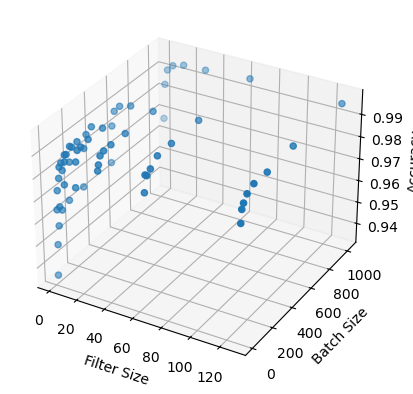

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#My Data
filter_size_array = [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 16, 16, 16, 16, 16, 16, 16, 16, 32, 32, 32, 32, 32, 32, 32, 32, 64, 64, 64, 64, 64, 64, 64, 64, 128, 128, 128, 128, 128, 128, 128, 128]
batch_size_array = [8, 16, 32, 64, 128, 256, 512, 1024, 8, 16, 32, 64, 128, 256, 512, 1024, 8, 16, 32, 64, 128, 256, 512, 1024, 8, 16, 32, 64, 128, 256, 512, 1024, 8, 16, 32, 64, 128, 256, 512, 1024, 8, 16, 32, 64, 128, 256, 512, 1024, 8, 16, 32, 64, 128, 256, 512, 1024, 8, 16, 32, 64, 128, 256, 512, 1024]
accuracy_array = [0.9355, 0.9492, 0.9571, 0.9629, 0.9647, 0.9656, 0.9666, 0.9678, 0.9655, 0.9737, 0.9785, 0.9807, 0.9819, 0.983, 0.9834, 0.9838, 0.9672, 0.9844, 0.9856, 0.9879, 0.9888, 0.9895, 0.9903, 0.9907, 0.9777, 0.9874, 0.99, 0.9923, 0.9919, 0.9936, 0.9932, 0.9933, 0.9779, 0.9888, 0.9932, 0.9934, 0.9943, 0.9944, 0.9947, 0.9948, 0.9881, 0.9904, 0.9937, 0.9946, 0.9948, 0.9948, 0.995, 0.9951, 0.9846, 0.9919, 0.991, 0.9926, 0.9957, 0.9961, 0.9965, 0.9964, 0.9836, 0.9892, 0.9912, 0.9938, 0.9955, 0.9953, 0.9965, 0.9959]
time_array = [86, 43, 21, 11, 5, 3, 2, 1, 87, 43, 21, 11, 6, 3, 2, 1, 87, 43, 21, 11, 6, 3, 2, 1, 88, 43, 22, 11, 6, 3, 2, 2, 89, 43, 22, 11, 6, 3, 2, 2, 89, 44, 22, 11, 6, 4, 3, 3, 90, 44, 22, 13, 8, 6, 5, 5, 91, 45, 27, 17, 13, 11, 10, 11]

xs = filter_size_array
ys = batch_size_array
ax.scatter(xs, ys, accuracy_array, marker='o')

ax.set_xlabel('Filter Size')
ax.set_ylabel('Batch Size')
ax.set_zlabel('Accuracy')

plt.show()

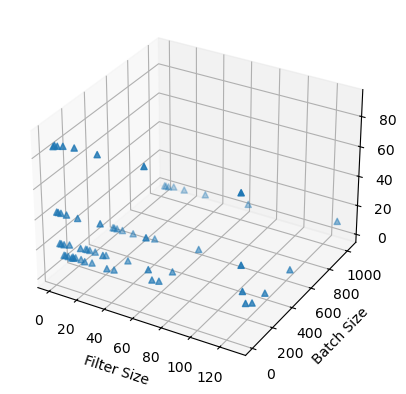

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, time_array, marker='^')

ax.set_xlabel('Filter Size')
ax.set_ylabel('Batch Size')
ax.set_zlabel('Time (s)')

plt.show()

###  Reflected on impact that specific domain/application would have on selections
Real-Time Systems Would favor smaller batch sizes like 64-128 despite slower training, since latency and adaptability to new data are critical (Masters 2018)

Large-Scale Image/Video Processing  Would prefer larger batch sizes larger batch sizes to maximize throughput, where training speed is more important than instant adaptability (Masters 2018)

Academic/Research Projects: A balanced choice 64 filters, batch size 256–512 is ideal, since accuracy and generalizability are prioritized over speed (Devarakonda 2018)